Jmeno: Ondrej Lukasek
Login: xlukas15
mail: xlukas15@stud.fit.vutbr.cz

Zacneme importem jednotlivych knihoven, ktere budou v projektu potreba.

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as sp

from IPython.display import Audio

Nyni nacteme vsechny jednotlive tony (respektive cely soubor klavir.waw), jak je napsano v zadani.
Pro nacteni jednotlivych tonu pouziji navod ze zadani.

In [2]:
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.35
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1
tones = np.arange(MIDIFROM, MIDITO+1)
s, Fs = sf.read('klavir.wav')
N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
xall = np.zeros((MIDITO+1, N)) # matrix with all tones - first signals empty,
# but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...
    xall[tone,:] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

Tony pro muj login (xlukas15) jsou 40 (82.41 Hz); 76 (659.26 Hz) a 105 (3520.00 Hz), ty si postupne ulozim do souboru, pojmenovanych podle zadani (a_orig.wav, b_orig.wav, c_orig.wav), a ulozim je do slozky audio.

In [3]:
sf.write('audio/a_orig.wav', xall[40], Fs)
sf.write('audio/b_orig.wav', xall[76], Fs)
sf.write('audio/c_orig.wav', xall[105], Fs)


Funkce pro vykresleni spektra tonu, jehoz jmeno zadame do parametru funkce.

In [4]:
def spectrumPrint(fileName):
    s, Fs = sf.read(fileName)
    display(Audio(s, rate=Fs)) # pozdeji potreba smazat
    N = s.size
    s_seg_spec = np.fft.fft(s)
    G = 10 * np.log10(1/N * np.abs(s_seg_spec)**2)
    f = np.arange(G.size) / N * Fs

    plt.figure(figsize=(10, 3))
    plt.plot(f[:f.size//2+1], G[:G.size//2+1])
    plt.xlabel('$frekvence [Hz]$')
    graphTitle = 'Spektrum', fileName
    plt.title(graphTitle)

Funkce pro vykresleni tonu, jehoz jmeno a frekvenci zadame do parametru.

In [5]:
def periodPrint(fileName, toneFreq):
    s, Fs = sf.read(fileName)
    N = s.size
    period = 1 / toneFreq
    sample = int(N * period)
    plt.figure(figsize=(10, 3))
    graphTitle = '3 periody', fileName
    plt.title(graphTitle)
    plt.plot(s[:6 * sample])
    plt.show()

Vykresleni period pro moje 3 tony:

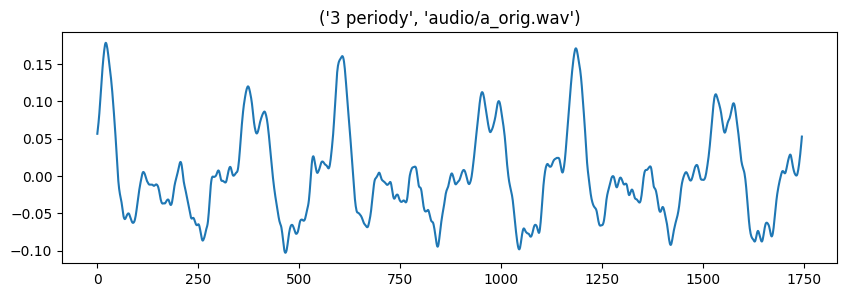

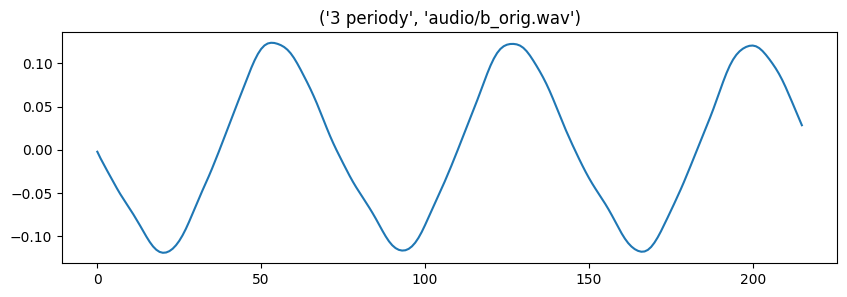

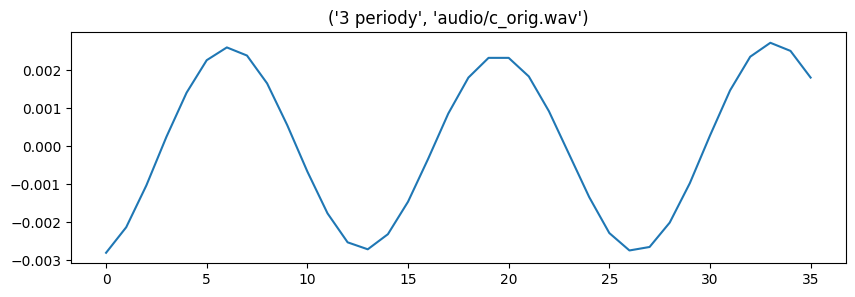

In [6]:
periodPrint('audio/a_orig.wav', 82.41)
periodPrint('audio/b_orig.wav', 659.26)
periodPrint('audio/c_orig.wav', 3520.00)

Vykresleni spekter pro moje 3 tony:

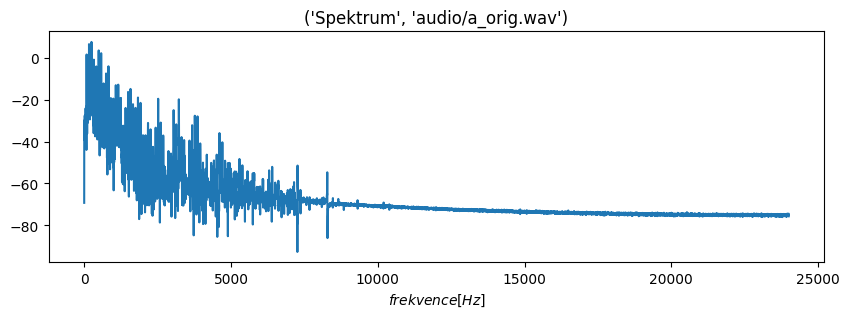

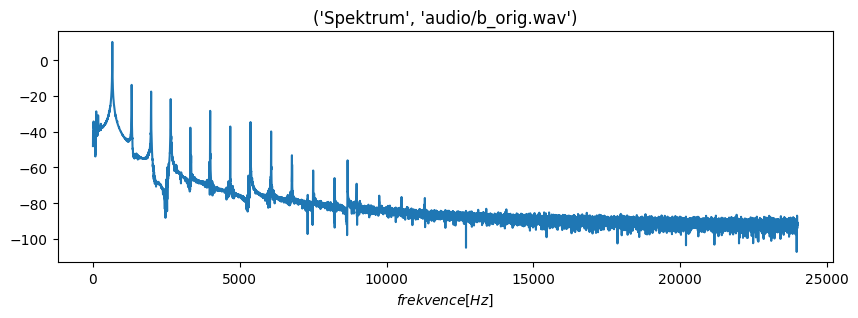

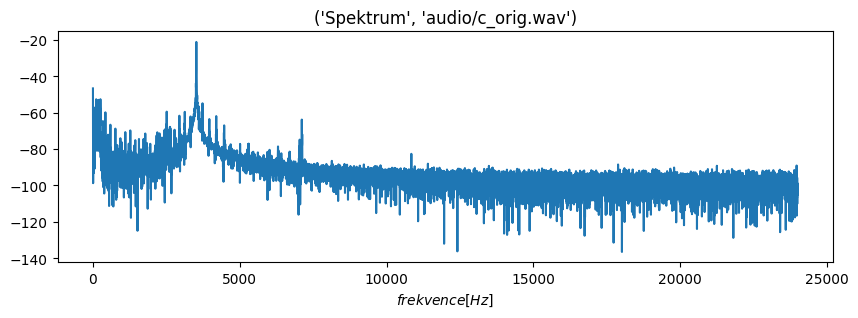

In [7]:
spectrumPrint('audio/a_orig.wav')
spectrumPrint('audio/b_orig.wav')
spectrumPrint('audio/c_orig.wav')